### Problem 1
#### a)
Let $p(x)$ be a polynomial of degree at most $n$, and $l_n(x)$ be an interpolating polynomial of $(p(x)$ of Lagrange Form, and $t_n(x)$ an interpolating polynomial of Newton's form, both of degree at most $n$. Then if both $l_n(x)$ and $t_n(x)$ both interpolate $p(x)$ equally at the same nodes, then the polynomial of the difference $l_n(x) - t_n(x)$ must contain $n+1$ zeros, which implies that $l_n(x) - t_(x)$ is identically the zero polynomial. Thus, $l_n(x) = t_n(x)$, and therefore the leading coefficients of either polynomial are equivalent.

#### b)
Consider a divided difference $f[x_0,...,x_k,...,x_l,...,x_n]$, where $x_i$ are arbitrary nodes, and k<l. Then if we switch $x_k$ and $x_l$ in the ordering, then our summation of lagrange constants within (1) is unchanged since the index of $x_k$ and $x_l$ can be manipulated to represent the new ordering. Therefore, taking any permutation of $x_0, x_1, ..., x_n$ leaves our divided difference unchanged.

### Problem 2

In [1]:
'''
By: Daniel Arredondo
Last Edited: 05/24/2020

NewtCof:
in: list of nodes and list of evaluated nodes
out: a single array, meant to be coefficients of Newtons Form (Newton's Divided Differences)

Horner_Func
in: list of nodes, list of evaluated nodes, points of x to approximate to
out: list of approximations at each x
'''

import numpy as np
import math as m
import matplotlib
import matplotlib.pyplot as mat 

def NewtCof(lst_f, lst_x): #lst_x are nodes, lst_f are values of f(nodes)
    c_j = np.array([]) #empty array
    n = len(lst_x) #length of list of nodes
    for x in range(n):
        c_j = np.append(c_j, lst_f[x]) #we create a dummy list to modify
    for k in range(1, n+1):
        for j in range(n-1, k-1, -1):
            c_j[j] = (c_j[j]-c_j[j-1])/(lst_x[j]-lst_x[j-k])
    return c_j

def Horner_Func(x, lst_f, lst_x):
    n = len(lst_x) #take length of array
    NC = NewtCof(lst_f,lst_x) #create our coefficients within the function
    p = NC[n-1] # We then set our value p to the last value in NC
    for j in range(n-2,-1,-1):
        p = NC[j] + (x - lst_x[j])*p 
    return p
        
def func(x): # Function for (2.b)
    temp = x**2
    temp *= -1
    return (m.exp(temp))

def tempfunc(x): #Test function using an interesting graph
    temp_1 = 5*(x)
    return (abs(m.sin(temp_1))) #Next time use a lambda function

# The following code is used to test the mapping function of
# the previous code, as to prepare for question (2.b)

temp_nodes = np.arange(-1,1.01, 0.2) # Our nodes we will approximate with
temp_fnodes = np.array([]) # Will hold the values of p(x) for x in nodes

temp_x = np.arange(-1,1.01,0.02) # resolution x, size 100
temp_truef = np.array([]) #resolution f(x) and will hold the true values at f(x)

test_poly_approx = np.array([]) # our approximations from Horner_Func

for t in temp_nodes:
    temp_fnodes = np.append(temp_fnodes, tempfunc(t))
    
for tt in temp_x:
    temp_truef = np.append(temp_truef, tempfunc(tt))
    test_poly_approx = np.append(test_poly_approx, Horner_Func(tt,temp_fnodes, temp_nodes))
    
mat.plot(temp_x, temp_truef, color='blue', label='f(x)')
mat.plot(temp_x, test_poly_approx, color='red', label='p(x)')
mat.grid(True, which='both')
mat.legend(loc='lower left')
mat.xlabel('$x$')
mat.title('Test: Difference between $|sin(5x)|$ and $p(x)$')
mat.show()

<Figure size 640x480 with 1 Axes>

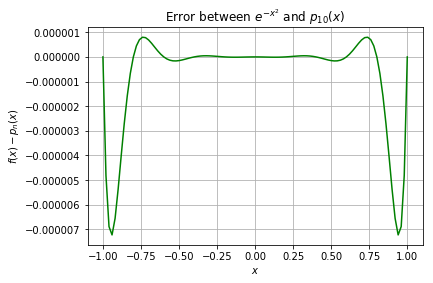

In [2]:
#
#     Problem 2.b
#

list_of_nodes = np.arange(-1,1.01, 0.2)
list_of_fnodes = np.array([])

list_of_x = np.arange(-1,1.01,0.02)
list_of_truef = np.array([])

poly_approx = np.array([])

for xx in list_of_nodes:
    list_of_fnodes = np.append(list_of_fnodes, func(xx))
    
for i in list_of_x:
    list_of_truef = np.append(list_of_truef, func(i))
    poly_approx = np.append(poly_approx, Horner_Func(i,list_of_fnodes, list_of_nodes))
    
#print(list_of_truef[0:25]-poly_approx[:25])

mat.plot(list_of_x, list_of_truef - poly_approx, color='green')
mat.grid(True, which='both')
mat.ylabel('$f(x) - p_n(x)$')
mat.xlabel('$x$')
mat.title('Error between $e^{-x^2}$ and $p_{10}(x)$')
mat.show()

### Problem 3

In [3]:
x_0 = 0.5
x_1 = 0.6

y_0 = -0.106530659712633 
y_1 = 0.051188363905973

finv_0_1 = (x_1-x_0)/(y_1-y_0)
# print(finv_0_1)
# print(-y_0*finv_0_1)
print(x_0 - y_0*finv_0_1)

0.5675445848373015


Thus, $p_1(0) =$ 0.5675445848373015

### Problem 4
We construct the table of Newton's Divided Differences as follows:

$
\begin{matrix}
0&|&0&&&\\
0&|&0&0&&\\
1&|&2&2&2&\\
1&|&2&3&1&-1 \\
\end{matrix}
$


and therefore
$$
p(x) = 0 + 0(x-0) + 2(x-0)^2 - (x-0)^2(x-1) = 3x^2 - x^3
$$

In [11]:
'''
UoA - Math 270 stuff
24 May 2020
'''
f_list_2 = [15,21,40,46]
f_list_1 = [15,21,30,51]

x_list = [0.0, 0.2, 0.4, 0.6]
print(NewtCof(f_list_1, x_list))
print(NewtCof(f_list_2, x_list))

[ 15.   30.   37.5 187.5]
[  15.           30.          162.5        -541.66666667]
